In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 3종류의 iris를 분류해볼 것임.
iris = load_iris()
X = iris.data[:,2:] # petal length와 petal width 데이터가 들어있음
y = iris.target     # iris label이 들어있음

# 결정트리는 전처리가 거의 필요없다. 특성 스케일링이 필요없다.
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

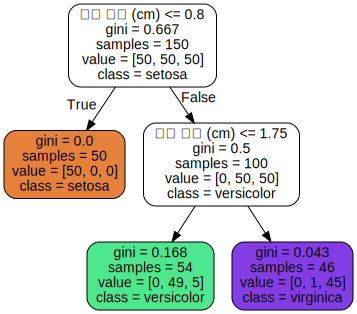

In [38]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_clf,
               feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"], # 훈련 데이터 X의 특성 순서와 동일
               class_names = iris.target_names,                     
               rounded = True,    # 모서리 둥글게 하기
               filled = True)     # 색 채우기
graph = graphviz.Source(dot_data)
graph

In [7]:
tree_clf.predict_proba([[5,1.5]]) # 확률을 추정한다.

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5,1.5]]) # 확률이 가장 높은 클래스로 추정한다.

array([1])

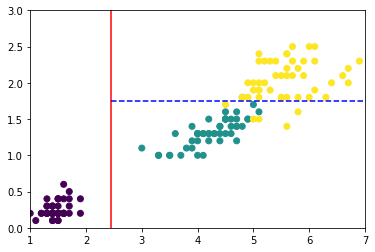

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot([2.45,2.45], [0,4], c='r')
plt.plot([2.45,7], [1.75,1.75], 'b--')
plt.axis([1,7,0,3])
plt.show()                  # 같은 공간에 속하면 모두 같은 확률로 판단한다.

### Training Algorithm: CART

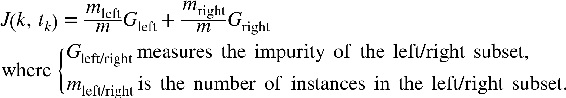

In [6]:
from IPython.display import Image
Image(filename='CART cost function for classification.png', width=500) 

# 결정 트리의 비용 함수.

여기서 G는 impurity를 재는 척도로서, gini를 나타낸다. gini는 각 클래스 비율을 제곱하여 합한 뒤 1에서 빼준 값이다. <br>
결정 트리의 작동방식은 다음과 같다. <br>
1. 위 비용함수를 최소로 만드는 <특징, 임계값>의 쌍을 찾는다. (예: 너비<2.45)
2. 각 하위 집합에서 또 다시 위 비용함수를 최소로 만드는 임계값을 찾아 나눈다.
3. 만약 더 이상 나눠도 소용없거나, 지정된 값(max_depth=2)에 도달하면 분류를 멈춘다. <br>

CART 방식은 제일 상위 단계부터 impurity를 최소화하는 값을 찾을 뿐, 마지막 분류의 impurity를 최적화하지는 않는다. <br>

## 규제 매개변수
훈련되기 전에 파라미터 수가 결정되지 않기 때문에, 비파라미터 모델이라 부른다 (선형회귀와 비교해보라). 그래서 모델이 데이터에 맞춰지고 자유도가 높은 대신 과대적합되기 쉽다. 

In [ ]:
# min_을 올리거나 max_를 낮추면 규제가 증가한다.
DecisionTreeClassifier(criterion=entropy, #불순도 측정 지표
                       max_depth=2, 
                       max_leaf_nodes = , # 잎의 최대 갯수
                       min_samples_split = , # 분할되기 위해 노드가 가져야 하는 최소 샘플 수
                       min_impurity_split = ,  #분할되기 위해 노드가 가져야 하는 최소 불순도
                       min_samples_leaf = , # 잎 노드가 가지고 있어야 할 최소 샘플 수
                       
                       max_features= , # 최소가 되는 불순도를 찾기 위해 불순도를 계산해볼 특성의 갯수
                       random_state= , # max_features 지정 시, 불순도를 측정할 특성이 전체 특성 중에서 일부만 선택된다.
                       presort = True)    # 샘플 수가 수천 개 이하인 경우, 미리 데이터를 정렬하여 훈련을 빠르게 만든다. 
                                         #그보다 많으면 오히려 느려진다.

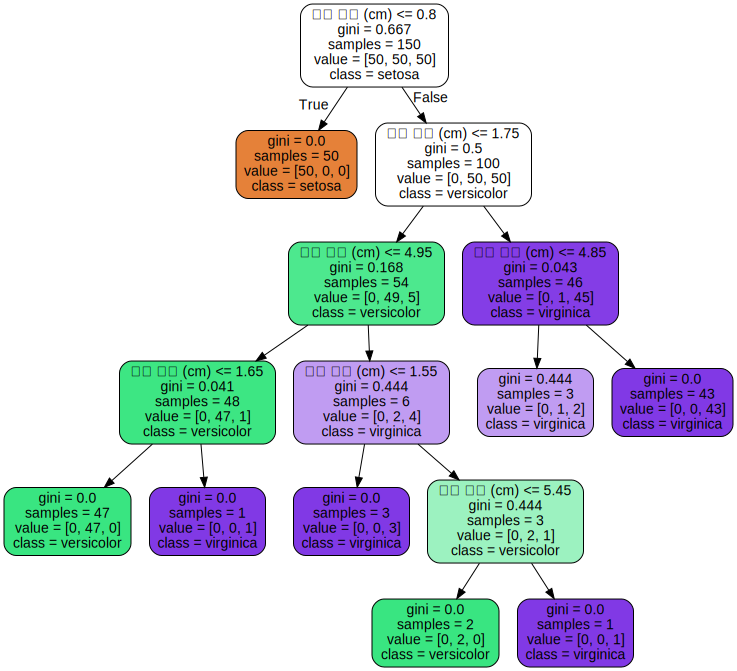

In [40]:
# 아무런 규제도 가하지 않은 경우.
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(DecisionTreeClassifier().fit(X,y),
               feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"], # 훈련 데이터 X의 특성 순서와 동일
               class_names = iris.target_names,                     
               rounded = True,    # 모서리 둥글게 하기
               filled = True)     # 색 채우기
graph = graphviz.Source(dot_data)
graph

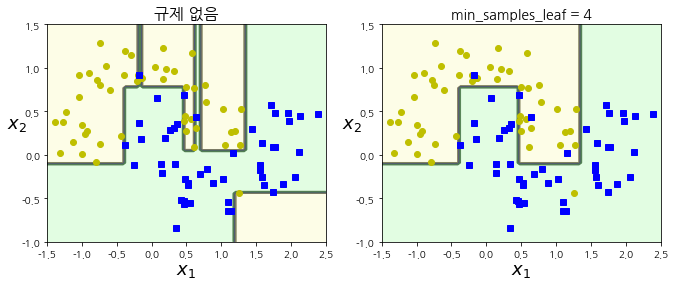

In [51]:
import numpy as np
import matplotlib 
from matplotlib.colors import ListedColormap
matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("규제 없음", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()  # 샘플 한 두 개 때문에 움푹 들어간 부분들이 규제로 인해 사라진 걸 볼 수 있다.

# 회귀

In [71]:
from sklearn.tree import DecisionTreeRegressor

# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
np.ceil(y)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

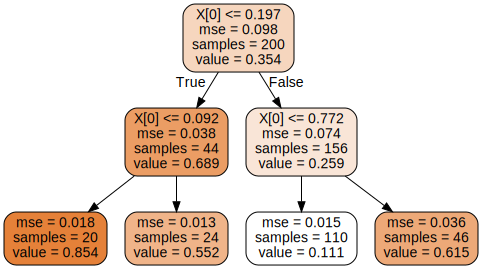

In [58]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_reg, rounded=True, filled=True)
graphviz.Source(dot_data) 
# x 값을 5등분한 뒤, 각 구역의 y값 평균으로 추정치를 내놓는다. 
# tree regression의 CART 알고리즘은 mse를 최소화하는 방향으로 분할한다.

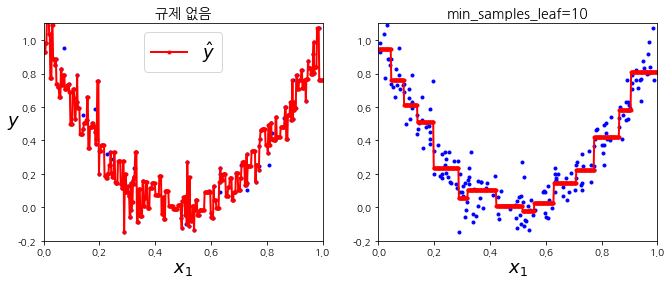

In [74]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("규제 없음", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()  # 회귀 모델도, 따로 지정을 안 하면 과대적합된다.